In [104]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

In [105]:
redwine <- read_delim("data/winequality-red.csv", delim = ";")
redwine

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [106]:
good_redwine <- redwine %>%
    filter(quality > 5) %>%
    mutate(quality = "good")
bad_redwine <- redwine %>%
    filter(quality <= 5) %>%
    mutate(quality = "bad") 
redwine_new <- rbind(good_redwine, bad_redwine)
redwine_new

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


In [107]:
glimpse(redwine_new)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <chr> "good", "good", "good", "good", "good", "good"…


From using the glimpse function, we see that the 'quality' variable is of type character. We want to change to this a factor, as shown below.

In [108]:
redwine_newfct <- redwine_new %>%
    mutate(quality = as_factor(quality))
    glimpse(redwine_newfct)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <fct> good, good, good, good, good, good, good, good…


To check and see exactly what levels we have in the 'quality' column, we use  the 'levels' function. By doing so, we verify that our desired classes of 'good' and 'bad' are present. This is shown below. 

In [109]:
redwine_newfct %>%
    pull(quality) %>%
    levels()

[1] "good" "bad"

In [110]:
redwine_num_obs <- nrow(redwine_newfct) 
redwine_newfct %>%
    group_by(quality) %>%
    summarize(count = n(),
             percentage = n() / redwine_num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<fct>,<int>,<dbl>
good,855,53.47092
bad,744,46.52908


From this, we see that there is more good quality wine than there is bad. The difference is not too large (~6.9%), so there is no noticeable pattern to draw from this that will help in our classification. We will continue exploring the data to see what else we can draw from this data set.

* Our predictive question is the following: "Can we use pH levels and alcohol content in red wine to predict the general quality, good and bad, of future red wine?"
* We visualize this relationship below

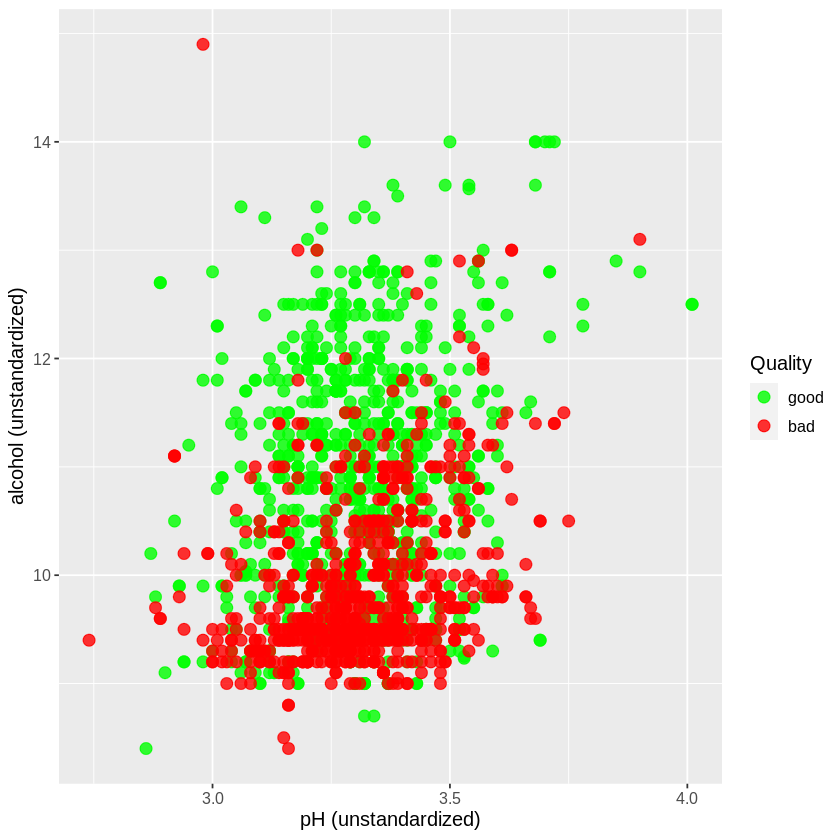

In [111]:
pH_alcohol <- redwine_newfct %>%
    ggplot(aes(x = pH, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "pH (unstandardized)", 
         y = "alcohol (unstandardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 12))
pH_alcohol

We want to standardize our data so that a more reasonable choosing of nearest neighbors takes place. First, we determine where our new observation point is with an unknown class, which we do below...

We want to create a workflow to skip intermediate steps later on, which will allow for a smoother coding experience. Further, we used fit() to combine all the steps of creating the model, recipe, and training data in realtion to the aforementioned (ex. applies all that has been done to a data set to predict the observation we want). 

In [133]:
#originally: knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       # set_engine("kknn") %>%
       # set_mode("classification")

set.seed(1000)

redwine <- read_delim("data/winequality-red.csv", delim = ";") %>%
    mutate(quality = as_factor(quality))

#new observation that we want to predict
new_wine <- tibble(pH = 3.5,
                  alcohol = 13)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       set_engine("kknn") %>%
       set_mode("classification")

redwine_recipe <- recipe(quality ~ pH + alcohol, data = redwine_newfct) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#originallY: redwine_recipe <- recipe(quality ~ pH, data = redwine_newfct) %>%
        #step_scale(all_predictors()) %>%
        #step_center(all_predictors())
                         
redwine_fit <- workflow() %>%
        add_recipe(redwine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = redwine_new)

wine_predict <- predict(redwine_fit, new_wine)
wine_predict

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



.pred_class
<fct>
good


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [ ]:
changes timothy made